<a href="https://colab.research.google.com/github/ABHIRAM199/my_practice/blob/main/car_resale_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Resale car price prediction using Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
#importing the drive module from the Google Colab for access to Google Drive

from google.colab import drive

In [7]:
#mounting the google drive to the directory

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#data file path

df = pd.read_csv('/content/drive/My Drive/DSML/Linear Regression/CAR DECKO/CarPred.csv')

df

,make,transmission_type,seats_cop,seats_family,seats_large,fuel_cng,fuel_diesel,fuel_electric,fuel_lpg,fuel_patrol,seller_dealer,seller_self,year,km_driven,engine,max_power,model,selling_price
0,hyundai,0,0,0,1,0,0,1,0,0,0,1,2009,42945,2492,287,verna,210447.937555
1,toyota,0,0,0,1,0,0,0,0,1,1,0,2003,176401,3240,88,corolla,272870.715932
2,ford,1,0,0,0,0,0,0,0,1,1,1,2018,46852,3250,169,aspire,251387.190744
3,honda,1,0,0,0,0,1,0,0,0,1,1,2014,162580,1317,99,jazz,139196.325731
4,hyundai,1,0,0,1,0,1,0,0,0,1,1,2004,11264,3268,196,i10,227022.794299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,toyota,0,0,1,0,0,0,0,0,1,1,0,2017,26164,4165,496,corolla,390288.866421
19996,hyundai,1,0,0,1,1,0,0,0,0,1,0,2011,121063,3164,162,i10,278819.752112
19997,honda,1,1,0,0,0,0,0,0,0,0,0,2005,155570,2533,299,civic,207397.304669
19998,honda,1,0,0,1,0,0,0,0,1,0,0,2008,193188,2015,125,city,183440.751987


In [9]:
df.head()

,make,transmission_type,seats_cop,seats_family,seats_large,fuel_cng,fuel_diesel,fuel_electric,fuel_lpg,fuel_patrol,seller_dealer,seller_self,year,km_driven,engine,max_power,model,selling_price
0,hyundai,0,0,0,1,0,0,1,0,0,0,1,2009,42945,2492,287,verna,210447.937555
1,toyota,0,0,0,1,0,0,0,0,1,1,0,2003,176401,3240,88,corolla,272870.715932
2,ford,1,0,0,0,0,0,0,0,1,1,1,2018,46852,3250,169,aspire,251387.190744
3,honda,1,0,0,0,0,1,0,0,0,1,1,2014,162580,1317,99,jazz,139196.325731
4,hyundai,1,0,0,1,0,1,0,0,0,1,1,2004,11264,3268,196,i10,227022.794299


In [11]:
#define x and y where x--> independent variable, y-->dependent or target variable

x= df["max_power"].values
y= df["selling_price"].values

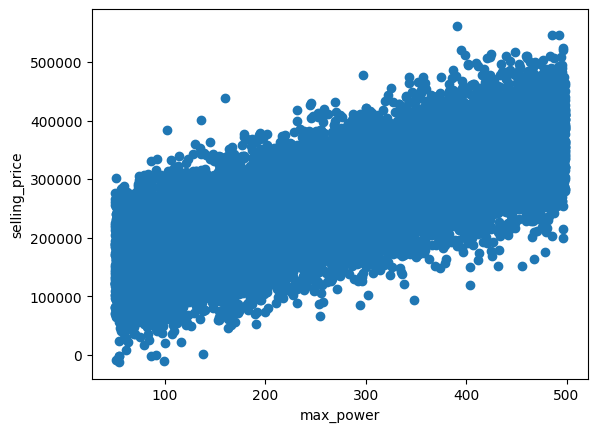

In [14]:
plt.scatter(x,y)
plt.xlabel("max_power")
plt.ylabel("selling_price")
plt.show()

In [15]:
df.columns

Index(['make', 'transmission_type', 'seats_cop', 'seats_family', 'seats_large',
       'fuel_cng', 'fuel_diesel', 'fuel_electric', 'fuel_lpg', 'fuel_patrol',
       'seller_dealer', 'seller_self', 'year', 'km_driven', 'engine',
       'max_power', 'model', 'selling_price'],
      dtype='object')

In [23]:
#simulation for linearity
#fit linear regression model

X=df[['year', 'km_driven', 'engine', 'max_power', 'transmission_type', 'seats_cop', 'seats_family', 'seats_large', 'fuel_cng', 'fuel_diesel', 'fuel_electric', 'fuel_patrol', 'fuel_lpg', 'fuel_electric', 'seller_dealer', 'seller_self']]
y=df['selling_price']

In [24]:
import statsmodels.api as sm
#Add a constant term with X part
X_with_const= sm.add_constant(X)
#Fit linear regression model,OLS=ordinary least square
model = sm.OLS(y,X_with_const).fit()

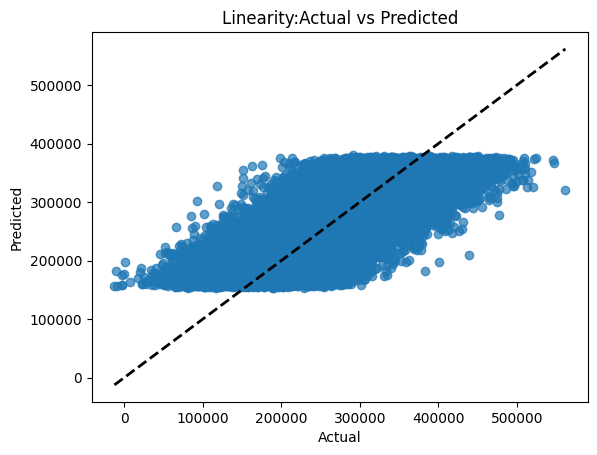

In [26]:
#check linearity assumption by plotting actual vs predicted values

plt.scatter(y,model.predict(),alpha=0.7)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Linearity:Actual vs Predicted')
plt.show()

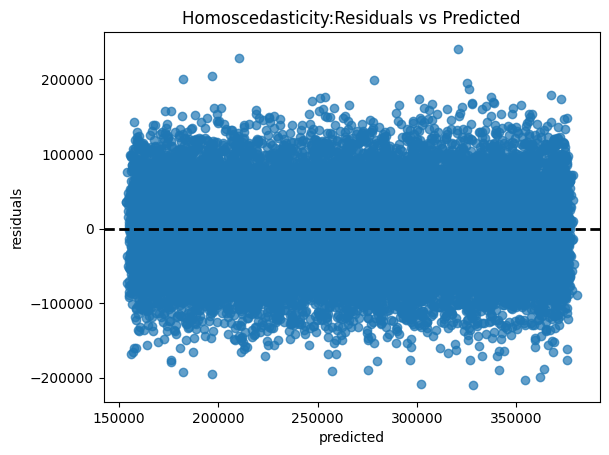

In [27]:
#Simulation for Homoscedasticity (constant variance/residuals)
#check homoscedasticity by plotting residuals vs predicted values

residuals = model.resid
plt.scatter(model.predict(),residuals,alpha=0.7)
plt.xlabel('predicted')
plt.ylabel('residuals')
plt.title('Homoscedasticity:Residuals vs Predicted')
plt.axhline(y=0,color='k',linestyle='--',lw=2)
plt.show()

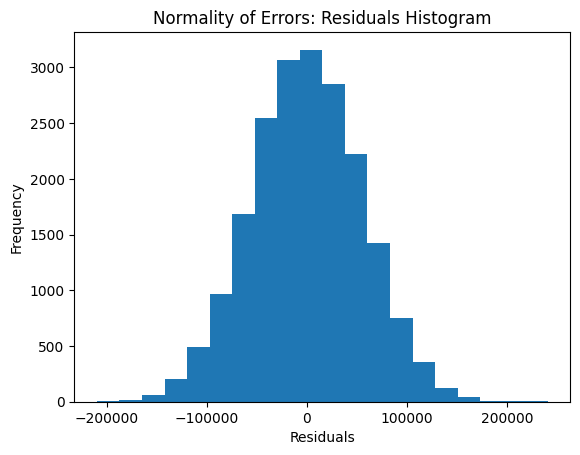

In [28]:
#simulation of Normality of Errors
#check normality of errors by plotting histogram of residuals

plt.hist(residuals,bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Normality of Errors: Residuals Histogram')
plt.show()

In [30]:
#simulation for no Autocorrelation
#check the independence of errors using the Durbin-Watson test(DW statistics)

durbin_watson = sm.stats.stattools.durbin_watson(residuals)
print("Durbin-Watson statistic: ",durbin_watson)


Durbin-Watson statistic:  2.01352969275313


implies no significant autocorrelation


In [31]:
#simulation for no perfect multicollinearity

#check for multicollinearity using variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data =X_with_const.copy()
vif_data = vif_data.drop(columns='const') #Exclude the constant term
vif = pd.DataFrame()
vif['variable'] =vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])]
print(vif)

             variable        VIF
0                year  56.648571
1           km_driven   4.007914
2              engine   7.729838
3           max_power   5.478773
4   transmission_type   1.998263
5           seats_cop   2.010321
6        seats_family   3.019145
7         seats_large   5.036540
8            fuel_cng   1.994996
9         fuel_diesel   3.047902
10      fuel_electric        inf
11        fuel_patrol  17.090605
12           fuel_lpg   9.085081
13      fuel_electric        inf
14      seller_dealer   1.995045
15        seller_self   1.977211


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
